In [9]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers

# Useful Functions

In [85]:
import numpy as np

class UsefulFunctions:

  def normalize(self, X):
    """
    Implements z-score normalization for a matrix

    Arguments:
    X (matrix) : matrix to be z-score normalized by feature

    Returns:
    X_norm (matrix) : normalized matrix by feature
    mean (vector) : mean along every feature
    std (vector) : standard deviation along every feature
    """
    mean = np.mean(X, axis=0)
    std = np.maximum(np.std(X, axis=0), 1e-15)
    X_norm = (X - mean) / std
    return X_norm, mean, std

  def train_test_split(self, X, ratio):
    """
    Performs a test-train split for the given ratio

    Arguments:
    X (matrix) : Dataset to be splitted
    ratio (scalar) : ratio to be splitted

    Returns:
    X_train (matrix) : train data
    X_test (matrix) : test data
    """
    size = int(X.shape[0]*ratio)
    X_train = X[0:size]
    X_test = X[size:]
    return X_train, X_test

  def one_hot(self, y, classes):
    # Performs one hot encoding for given y and number of classes
    return np.eye(classes)[y]

  def reverse_one_hot(self, y):
    # Reverses the one hot encoding performed
    return np.argmax(y, axis=1)

  def add_bias(self, X):
    # Adds a feature of 1s
    return np.c_[np.ones(X.shape[0]), X]

  def r2_score(self, true, pred):
    """
    Calculates r2_score for given true and predicted values

    Arguments:
    true (vector) : true values
    pred (vector) : predicted values

    Returns:
    score (scalar) : R2 score of the given data
    """
    res = true - pred
    square = true - np.mean(true)
    score = 1 - ((np.sum(np.square(res)))/(np.sum(np.square(square))))
    return score

  def mean_squared_error(self, true, pred):
    # Calculates mean squared error of model
    return np.mean((true - pred)**2)

  def mean_absolute_error(self, true, pred):
    # Calculates mean absoulte error of model
    return np.mean(np.abs(true - pred))

  def classification_accuracy(self, true, pred):
    """
    Displays the accuracy of a classification model

    Arguments"
    true (vector) : true values
    pred (vector) : predicted values
    """
    true = true.reshape(-1,1)
    pred = pred.reshape(-1,1)
    accurate_predictions = np.sum(true == pred)
    accuracy = np.mean(true == pred)
    print(f"Successfully predicted {accurate_predictions} out of {int(len(true))}")
    print(f"Accuracy: {accuracy}")

# Linear Regression



In [15]:
import numpy as np

class LinearRegression:

  def __init__(self):
    self.cost_history = []
    self.w = []
    self.b = 0
    self.mean = 0
    self.std = 1

  def cost(self, X, y):
    """
    Calculates value of cost function

    Arguments:
    X (matrix) : Dataset of m examples with n features
    y (vector) : Target values

    Returns:
    cost (scalar) : Cost of the iteration
    """
    f = np.matmul(X, self.w) + self.b
    cost = np.sum((f-y)**2)

    return cost

  def gradient(self, X, y):
    """
    Computes gradient of cost wrt w and b

    Arguments:
    X (matrix) : Dataset of m examples with n features
    y (vector) : Target values

    Returns:
    dj_dw (vector) : Gradient wrt w
    dj_db (scalar) : Gradient wrt b
    """
    z = np.matmul(X, self.w) + self.b
    dj_dw = np.matmul(z-y, X) / X.shape[0]
    dj_db = np.mean(z-y)

    return dj_dw, dj_db

  def fit(self, X, y, alpha, epochs, normalize=True):
    """
    Fits the model wrt data

    Arguments:
    X (matrix) : Dataset of m examples with n features
    y (vector) : Target values
    alpha (scalar) : Learning rate
    epochs (scalar) : number of epochs to be computed
    normalize (boolean) : indicates if data is needed to be normalized
    """
    if(normalize):
      X, self.mean, self.std = UsefulFunctions().normalize(X)

    self.cost_history = []
    self.w = np.zeros(X.shape[1])
    self.b = 0

    for i in range(epochs):
      dj_dw, dj_db = self.gradient(X, y)
      self.w -= alpha*dj_dw
      self.b -= alpha*dj_db
      cost = self.cost(X, y)
      self.cost_history.append(cost)

    return self

  def predict(self, X):
    """
    Predicts values using learned parameters

    Arguments:
    X (matrix) : Data to be made predictions of

    Returns:
    y (vector) : predicted values
    """
    X = (X - self.mean) / self.std
    y = np.matmul(X, self.w) + self.b

    return y


In [16]:
# Exploring the dataset

dataset = pd.read_csv(r'C:\Users\whint\Downloads\ML\Datasets\Lineardata_train.csv')
dataset.head

<bound method NDFrame.head of              target  feature 1  feature 2  feature 3  feature 4  feature 5  \
0      -5928.102746  -0.900470   0.850978  -2.069526   0.573887  -6.878165   
1       -738.890855  -0.266567   2.865496  -6.396780   1.517906  -0.339633   
2     -20186.841587  -0.058919   0.635366  -3.563216   1.848845  -4.255648   
3      30145.771674  -0.892483  -0.287881  -1.643086   0.630195  -2.989874   
4      -3469.553888  -1.568419   1.535581  -4.562323  -1.953245  -3.505171   
...             ...        ...        ...        ...        ...        ...   
49995  -7567.227845   2.029910  -0.928164  -2.463563   5.312071   2.070290   
49996  -9973.851789  -0.223475   0.341542  -4.423256  -0.104668   4.384320   
49997  -8246.697221  -0.321085   1.608386 -11.177100  -1.140550 -10.832891   
49998  -9101.101377  -2.383432   1.214911   0.925113   0.017874   2.022561   
49999   3420.729860   1.396534   1.044984   6.974686  -2.503387  -6.951460   

       feature 6  feature 7  feat

In [17]:
X = dataset.iloc[:, 1:].to_numpy()
y = dataset.iloc[:, 0].to_numpy()

lr = LinearRegression()

ratio = 0.8
X_train, X_test = UsefulFunctions().train_test_split(X, ratio)
y_train, y_test = UsefulFunctions().train_test_split(y, ratio)

lr.fit(X_train, y_train, 0.01, 20000)
y_pred = lr.predict(X_test)

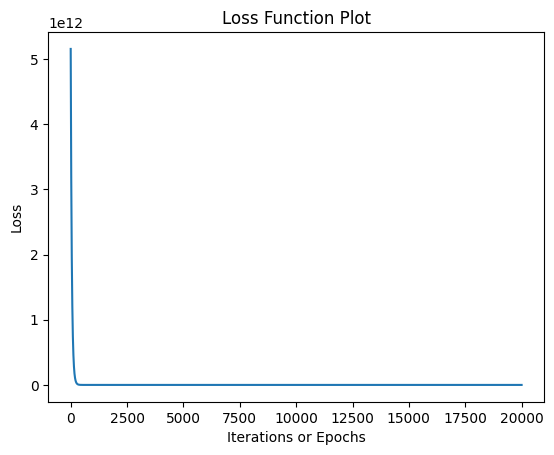

In [18]:

# Visualizing the cost

iterations = range(1, len(lr.cost_history) + 1)
plt.plot(iterations, lr.cost_history, linestyle='-')

# Add labels and title
plt.xlabel('Iterations or Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Plot')

# Show the plot
plt.show()

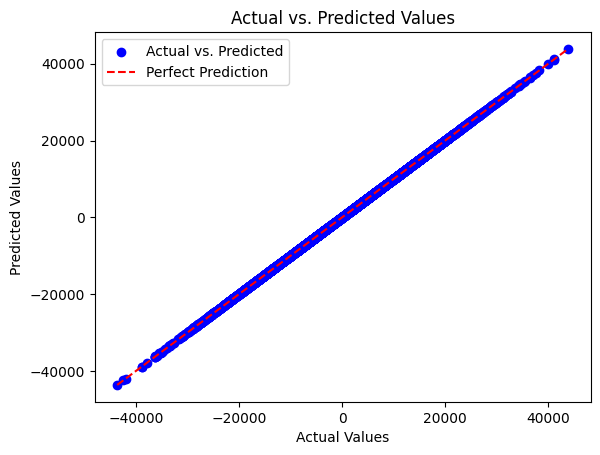

Mean Absolute Error: 0.08024026566607234
Mean Squared Error: 0.010129193965037607
R2 Score: 0.9999999999216167


In [19]:
# Visualizing the data
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()

# Calculating accuracy of the data
print("Mean Absolute Error:", UsefulFunctions().mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", UsefulFunctions().mean_squared_error(y_test, y_pred))
print("R2 Score:", UsefulFunctions().r2_score(y_test, y_pred))

The above cells were to fine tune our model with different hyper parameters, Now we shall use the entire training dataset to train with 100% of the dataset and make predictions on the test dataset provided seperately

In [20]:
dataset = pd.read_csv(r'C:\Users\whint\Downloads\ML\Datasets\Lineardata_train.csv')
test = pd.read_csv(r'C:\Users\whint\Downloads\ML\Datasets\Lineardata_test.csv')

test.head

<bound method NDFrame.head of          ID  feature 1  feature 2  feature 3  feature 4  feature 5  feature 6  \
0     14189   0.634260  -0.771727   4.297694  -2.022710   0.487001   2.316767   
1     14742   0.456128   3.154433   0.182006  -0.730634  -5.759530   1.448589   
2     13905   0.390815  -5.278284   1.625943  -1.775914  -2.461865   1.439888   
3     10072   1.067949   4.851061   3.909243   2.005500   2.880720   1.054944   
4     14879  -0.589611  -3.533016  -1.705736   2.063013  -0.738696   2.475443   
...     ...        ...        ...        ...        ...        ...        ...   
9995  19851   1.967136  -6.819440   3.597360  -0.482508   4.679231   0.861442   
9996  11818  -0.656285  -3.294604  12.222256  -0.184108   8.286414  -6.437312   
9997  15552  -0.349932   4.611955  -2.814735   1.851754  -2.354195   6.639817   
9998  12161   0.295833   1.825552  -8.824731   2.119270  -4.629213  -2.354794   
9999  14055  -0.555837  -0.111039  -0.477407  -4.750409   1.870868   0.971285  

In [22]:
lr1 = LinearRegression()

X_train = dataset.iloc[:, 1:].to_numpy()
y_train = dataset.iloc[:, 0].to_numpy()
X_test = test.iloc[:, 1:].to_numpy()

lr1.fit(X_train, y_train, alpha=0.01, epochs=20000)
y_pred = lr1.predict(X_test)

df = pd.DataFrame(y_pred)
df.to_csv(r"C:\Users\whint\Downloads\ML\Predictions\linear_pred")

# Polynomial regression

In [34]:

import numpy as np

class PolynomialRegression:

  def __init__(self):
    self.cost_history = []
    self.w = []
    self.b = 0
    self.mean = 0
    self.std = 0
    self.degree = 0

  def cost(self, X, y):
    """
    Calculates value of cost function

    Arguments:
    X (matrix) : Dataset of m examples with n features
    y (vector) : Target values

    Returns:
    cost (scalar) : Cost of the iteration
    """
    f = np.matmul(X, self.w) + self.b
    cost = np.sum((f-y)**2)

    return cost

  def gradient(self, X, y):
    """
    Computes gradient of cost wrt w and b

    Arguments:
    X (matrix) : Dataset of m examples with n features
    y (vector) : Target values

    Returns:
    dj_dw (vector) : Gradient wrt w
    dj_db (scalar) : Gradient wrt b
    """
    z = np.matmul(X, self.w) + self.b
    dj_dw = np.matmul(z-y, X) / X.shape[0]
    dj_db = np.mean(z-y)

    return dj_dw, dj_db

  def fit(self, X, y, degree, alpha, epochs, normalize=True):
    """
    Fits the model wrt data

    Arguments:
    X (matrix) : Dataset of m examples with n features
    y (vector) : Target values
    degree (scalar) : degree of polynomial required
    alpha (scalar) : Learning rate
    epochs (scalar) : number of epochs to be computed
    normalize (boolean) : indicates if data is needed to be normalized
    """
    self.degree = degree
    X = self.poly_features(self.degree, X)

    if(normalize):
      X, self.mean, self.std = UsefulFunctions().normalize(X)

    self.cost_history = []
    self.w = np.zeros(X.shape[1])
    self.b = 0

    for i in range(epochs):
      dj_dw, dj_db = self.gradient(X, y)
      self.w -= alpha*dj_dw
      self.b -= alpha*dj_db
      cost = self.cost(X, y)
      self.cost_history.append(cost)

    pass

  def predict(self, X, normalize=True):
    """
    Predicts values using learned parameters

    Arguments:
    X (matrix) : Data to be made predictions of

    Returns:
    y (vector) : predicted values
    """
    X = self.poly_features(self.degree, X)

    if(normalize):
      X = (X - self.mean) / self.std

    y = np.matmul(X, self.w) + self.b

    return y

  def poly_features(self, degree, X):
    """
    Polynomializes data to the given degree

    Arguments:
    degree (scalar) : degree of polynomial
    X (matrix) : Dataset of m examples and n features

    Returns:
    X_poly (matrix) : Dataset with polynomialzed features
    """
    features = [i for i in range(X.shape[1])]
    combinations = self.generate_feature_combinations(features, degree)

    X_poly = np.ones((X.shape[0], len(combinations)))

    for i, combination in enumerate(combinations):
      for j, power in enumerate(combination):
        X_poly[:, i] *= X[:, j]**power

    X_poly = X_poly[:, 1:]

    return X_poly

  def generate_feature_combinations(self, features, degree, current_combination=[], current_degree=0, index=0):
    """
    Recursive method which generates all combinations of features

    Arguments:
    features (vector) : vector with all features
    degree (scalar) : degree of polynomial
    current_combination (vector) : stores the ongoing combination, default=[]
    current_degree (scalar) : stores the total degree of ongoing combination, default=[]
    current_index (scalar) : stores the index of feature being traversed, default=0

    Returns:
    combinations (matrix) : contains all possible combinations of features
    """
    if current_degree > degree:
      return []

    if index == len(features):
      return [current_combination]

    combinations = []

    for i in range(degree - current_degree + 1):
      new_combination = current_combination + [i]
      combinations.extend(self.generate_feature_combinations(features, degree, new_combination, current_degree + i, index + 1))

    return combinations

The following cells implement the basic functions necessary for polynomial regression

In [35]:
# Load and Explore the Dataset

dataset = pd.read_csv(r"C:\Users\whint\Downloads\ML\Datasets\Polynomialdata_train.csv")
test = pd.read_csv(r"C:\Users\whint\Downloads\ML\Datasets\Polynomialdata_test.csv")

# Display the first few rows of the dataset for exploration
dataset.head()

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367


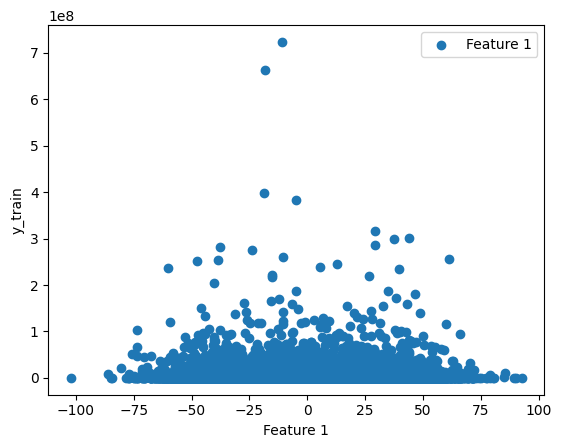

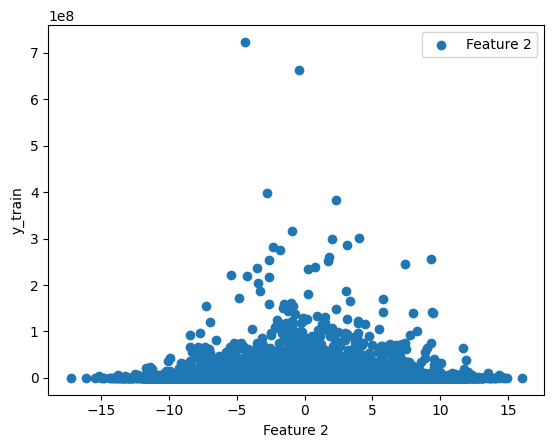

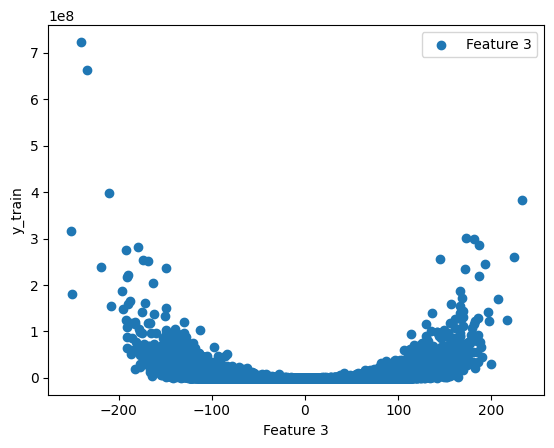

In [36]:
X = dataset.iloc[:, 1:].to_numpy()
y = dataset.iloc[:, 0].to_numpy()

pr = PolynomialRegression()

ratio = 0.8
X_train, X_test = UsefulFunctions().train_test_split(X, ratio)
y_train, y_test = UsefulFunctions().train_test_split(y, ratio)

feature_names = ['Feature 1', 'Feature 2', 'Feature 3']

for i in range(3):
    plt.scatter(X_train[:, i], y_train, label=feature_names[i])
    plt.xlabel(feature_names[i])
    plt.ylabel('y_train')
    plt.legend()
    plt.show()

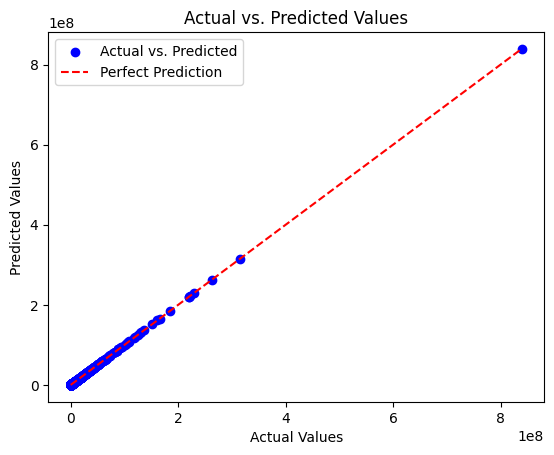

Mean Absolute Error: 3.330624893074551e-08
Mean Squared Error: 2.2836959870525088e-14
R2 Score: 1.0


In [37]:
pr.fit(X_train, y_train, 6, 0.1, 50000)
y_pred = pr.predict(X_test)

# Visualizing the data
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()

# Calculating accuracy of the data
print("Mean Absolute Error:", UsefulFunctions().mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", UsefulFunctions().mean_squared_error(y_test, y_pred))
print("R2 Score:", UsefulFunctions().r2_score(y_test, y_pred))

# Logistic Regression






In [44]:
class LogisticRegression:
  def __init__(self):
    self.w = 0
    self.std = 1
    self.mean = 0
    self.normalize = True
    self.bias = True

  def sigmoid(self, x):
    # Computes the sigmoid of the given input
    return 1 / (1 + np.exp(-np.clip(x, -700, 700)))

  def fit(self, X, y, alpha, epochs, normalize=True, bias=True):
    """
    Fits the model wrt data

    Arguments:
    X (matrix) : Dataset of m examples with n features
    y (vector) : Target values
    alpha (scalar) : Learning rate
    epochs (scalar) : number of epochs to be computed
    normalize (boolean) : indicates if data is needed to be normalized
    bias (boolean) : indicates if bias is needed to be added to data
    """

    self.normalize = normalize
    self.bias = bias

    if(self.normalize):
      X, self.mean, self.std = UsefulFunctions().normalize(X)

    if(self.bias):
      X = UsefulFunctions().add_bias(X)

    self.w = np.zeros((X.shape[1], y.shape[1]))

    for epoch in range(epochs):
      z = np.matmul(X, self.w)
      f = self.sigmoid(z)
      dw = np.matmul(X.T, (f - y)) / y.shape[0]
      self.w -= alpha * dw
    pass

  def predict(self, X):
    """
    Predicts values using learned parameters

    Arguments:
    X (matrix) : Data to be made predictions of

    Returns:
    y (vector) : predicted values
    """
    if(self.normalize):
      X = (X - self.mean)/self.std

    if(self.bias):
      X = UsefulFunctions().add_bias(X)

    z = np.matmul(X, self.w)
    y = self.sigmoid(z)

    return y

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-np.clip(x, -700, 700)))

  def fit(self, X, y, alpha, epochs, normalize=True, bias=True):
    self.normalize = normalize
    self.bias = bias

    if(self.normalize):
      X, self.mean, self.std = UsefulFunctions().normalize(X)

    if(self.bias):
      X = UsefulFunctions().add_bias(X)

    self.w = np.zeros((X.shape[1], y.shape[1]))

    for epoch in range(epochs):
      z = np.matmul(X, self.w)
      f = self.sigmoid(z)
      dw = np.matmul(X.T, (f - y)) / y.shape[0]
      self.w -= alpha * dw

    return self

  def predict(self, X):
    if(self.normalize):
      X = (X - self.mean)/self.std

    if(self.bias):
      X = UsefulFunctions().add_bias(X)

    z = np.matmul(X, self.w)
    f = self.sigmoid(z)
    return f

In [45]:
# Load and Explore the Dataset
dataset = pd.read_csv(r'C:\Users\whint\Downloads\ML\Datasets\Classification_train.csv')
test = pd.read_csv(r'C:\Users\whint\Downloads\ML\Datasets\Classification_test.csv')

X = dataset.iloc[:, 1:].to_numpy()
y = dataset.iloc[:, 0].to_numpy()

ratio = 0.8
X_train, X_test = UsefulFunctions().train_test_split(X, ratio)
y_train, y_test = UsefulFunctions().train_test_split(y, ratio)

classes = 10
y_train = UsefulFunctions().one_hot(y_train, classes)

logr = LogisticRegression()

logr.fit(X_train, y_train, alpha=0.1, epochs=6000)
y_pred = logr.predict(X_test)

y_pred = UsefulFunctions().reverse_one_hot(y_pred)

UsefulFunctions().classification_accuracy(y_test, y_pred)

Successfully predicted 5780 out of 6000
Accuracy: 0.9633333333333334


# K Nearest Neighbours

In [ ]:

import numpy as np

class KNearestNeighbours:
  def __init__(self):
    self.mean = 0
    self.std = 1

  def distances(self, x1, X2):
    """
    Returns the distances of one point (x1[vector]) wrt multiple points (X2[matrix])
    """
    return np.sum(np.abs(X2 - x1), axis=1)

  def compute(self, X_train, y_train, X_test, k=5, normalize=True):
    """
    Implements the KNN algorithm for the given data

    Arguments:
    X_train (matrix) : train data
    y_train (vector) : train data
    X_test (matrix) : test data
    k (scalar) : number of neighbours to be taken into consideration
    normalize (boolean) : indicates if data is needed to be normalized

    Returns:
    predictions (vector) : predictions made using KNN algorithm
    """
    if(normalize):
      X_train, self.mean, self.std = UsefulFunctions().normalize(X_train)
      X_test = (X_test - self.mean) / self.std


    predictions = []
    for x in X_test:
      distances = self.distances(x, X_train)
      indices = np.argsort(distances)[:k]
      labels = y_train[indices]
      prediction = np.bincount(labels).argmax()
      predictions.append(prediction)

    return predictions


In [ ]:
dataset = pd.read_csv(r'C:\Users\whint\Downloads\ML\Datasets\Classification_train.csv')
test = pd.read_csv(r'C:\Users\whint\Downloads\ML\Datasets\Classification_test.csv')

X = dataset.iloc[:, 1:].to_numpy()
y = dataset.iloc[:, 0].to_numpy()

X_train, X_test = UsefulFunctions().train_test_split(X, ratio)
y_train, y_test = UsefulFunctions().train_test_split(y, ratio)

ratio = 0.8
uf = UsefulFunctions().
knn = KNearestNeighbours()

y_pred = knn.compute(X_train, y_train, X_test, k=5)
UsefulFunctions().classification_error(y_test, y_pred)

Successfully predicted 5842 out of 6000
Accuracy: 0.9736666666666667


# Neural Networks

In [90]:
import numpy as np


class NeuralNetwork:

  def __init__(self):
    self.model = []
    self.loss_history = []
    self.mean = 0
    self.std = 1

  def xavier_init(self, input, output):
    variance = 2.0 / (input + output)
    return np.random.randn(input, output) * np.sqrt(variance)

  def relu(self, z):
    return np.maximum(0, np.minimum(z,1e15))

  def linear(self, z):
    return z

  def softmax(self, z):
    return np.exp(np.clip(z, -700, 700)) / (np.sum(np.exp(np.clip(z, -700, 700)), axis=1))

  function_map = {
    'relu': relu,
    'linear': linear,
    'softmax': softmax
  }

  def relu_derivative(self, z):
    return (z > 0) * 1

  def linear_derivative(self, z):
    return np.ones_like(z)

  derivative_map = {
    'relu': relu_derivative,
    'linear': linear_derivative,
  }

  def Categorical_Crossentropy(self, true, pred):
    pred = np.clip(pred, 1e-15, 1-(1e-15))
    return -np.sum(np.multiply(true, np.log(pred)), axis=1)

  def Crossentropy_gradient(self, true, pred):
    pred = np.clip(pred, 1e-15, 1-(1e-15))
    return np.subtract(pred,true)

  def dense(self, units, activation):
    """
    Initializes layer of a neural network

    Arguments:
    units (scalar) : number of units
    activation (string) : activation function required in this layer

    Available activation functions: relu, linear, softmax(only for final layer)
    """
    return (units, activation)

  def Sequential_model(self, Input_size, layers):
    """
    Initializes a sequential neural network model

    Arguments:
    Input_size (tuple) : size of the training data
    layers : To be initialized using dense function

    """
    self.model = []
    m, n = Input_size

    for i in range(len(layers)):
      units, activation = layers[i]
      if i == 0:
        self.model.append([self.xavier_init(n, units), self.xavier_init(1, units), np.zeros((m, n)), activation])
      else:
        Input = self.model[i - 1][0].shape[1]
        self.model.append([self.xavier_init(Input, units), self.xavier_init(1, units), np.zeros((m, Input)), activation])

    pass

  def compute(self, layer):
    W, b, a_in, g = layer
    z = np.matrix(np.matmul(a_in, W) + b)
    a_out = self.function_map.get(g)(self, z)
    return a_out

  def fit(self, X, y, alpha, epochs, batch_size, normalize=True):
    """
    Fits the model using mini-batch gradient descent

    Arguments:
    X (matrix) : Dataset of m examples with n features
    y (vector) : Target values
    alpha (scalar) : Learning rate
    epochs (scalar) : number of epochs to be computed
    batch_size (scalar) : number of examples to be taken for mini-batch
    normalize (boolean) : indicates if data is needed to be normalized
    """
    if(normalize):
      X, self.mean, self.std = UsefulFunctions().normalize(X)

    self.loss_history = []
    for epoch in range(epochs):

      self.model[0][2] = X

      for i in range(len(self.model)-1):
        self.model[i+1][2] = self.compute(self.model[i])

      y_pred = self.compute(self.model[-1])
      loss = self.Categorical_Crossentropy(y, y_pred)
      print("Epoch:", epoch, "   Loss:", np.sum(loss), end='')
      self.loss_history.append(np.sum(loss))

      for start in range(0, X.shape[0], batch_size):
        end = start + batch_size
        end = min(end, X.shape[0])

        self.model[0][2] = X[start:end]
        y_batch = y[start:end]

        for i in range(len(self.model)-1):
          self.model[i+1][2] = self.compute(self.model[i])

        f = self.compute(self.model[-1])

        delta = self.Crossentropy_gradient(y_batch, f)
        W, b, x, g = self.model[-1]
        b = b.reshape(1,-1)
        W -= alpha*(np.matmul(x.T, delta)/x.shape[0])
        b -= alpha*(np.mean(delta, axis=0))
        delta = np.matmul(delta,W.T)

        for W, b, x, g in reversed(self.model[:-1]):
          z = np.matrix(np.matmul(x, W) + b)
          delta = np.multiply(delta, self.derivative_map.get(g)(self, z))
          b = b.reshape(1,-1)
          W -= alpha*(np.matmul(x.T, delta)/x.shape[0])
          b -= alpha*(np.mean(delta, axis=0))
          delta = np.matmul(delta,W.T)
      print('',end='\r')

    pass

  def predict(self, X):
    """
    Predicts values using learned parameters

    Arguments:
    X (matrix) : Data to be made predictions of

    Returns:
    y (vector) : predicted values
    """
    X = (X - self.mean)/self.std

    self.model[0][2] = X
    for i in range(len(self.model)-1):
      self.model[i+1][2] = self.compute(self.model[i])
    y = self.compute(self.model[-1])

    y = np.argmax(y, axis=1)

    return y

In [91]:
# Load and Explore the Dataset
dataset = pd.read_csv(r'C:\Users\whint\Downloads\ML\Datasets\Classification_train.csv')
test = pd.read_csv(r'C:\Users\whint\Downloads\ML\Datasets\Classification_test.csv')

# Data Preprocessing and Visualization
X = dataset.iloc[:, 1:].to_numpy()
y = dataset.iloc[:, 0].to_numpy()

nn = NeuralNetwork()

classes = 10
ratio = 0.8

X_train, X_test = UsefulFunctions().train_test_split(X, ratio)
y_train, y_test = UsefulFunctions().train_test_split(y, ratio)

y_train = UsefulFunctions().one_hot(y_train, classes)


In [92]:
nn.Sequential_model(Input_size = X_train.shape, layers=[
    nn.dense(units = 32, activation = 'relu'),
    nn.dense(units = 10, activation = 'softmax')
])

nn.fit(X_train, y_train, 0.05, 40, 32)

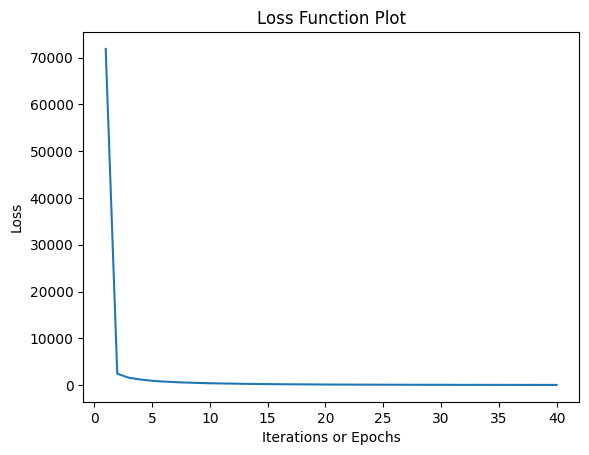

Successfully predicted 5885 out of 6000
Accuracy: 0.9808333333333333


In [93]:
y_pred = nn.predict(X_test)
iterations = range(1, len(nn.loss_history) + 1)

# Plot the loss values
plt.plot(iterations, nn.loss_history, linestyle='-')

# Add labels and title
plt.xlabel('Iterations or Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Plot')

# Show the plot
plt.show()

UsefulFunctions().classification_accuracy(y_test, y_pred)

# K Means Clustering


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers

class KMeansClustering:
  def __init__(self):
    self.labels = []
    self.centres = []
    self.data = []
    self.mean = 0
    self.std = 1

  def distances(self, x1, X2):
    # Returns the distances of one point (x1[vector]) wrt multiple points (X2[matrix])
    return np.sum(np.abs(X2 - x1), axis=1)

  def clustering(self, data, k, epochs, normalize=True):
    """
    Implements KMeans Clustering algorithm for the given data

    Arguments:
    data (matrix) : Dataset with examples and its features
    k (scalar) : number of clusters
    epochs (scalar) : number of epochs
    normalize (boolean) : indicates if data is needed to be normalized
    """
    if(normalize):
      self.data, self.mean, self.std = UsefulFunctions().normalize(data)
    else:
      self.data = data
    self.centres = self.data[np.random.randint(0, self.data.shape[0], k)]
    self.labels = np.zeros(self.data.shape[0])

    for epoch in range(epochs):
      for i,x in enumerate(self.data):
        self.labels[i] = np.argmin(self.distances(x, self.centres))

      for i in range(len(self.centres)):
        cluster_points = self.data[np.where(self.labels==i)[0]]
        self.centres[i] = np.mean(cluster_points, axis=0)

    pass

  def plot(self, axes):
    """
    Plots a scatter plot of clusters wrt 2 features

    Arguments:
    axes (tuple) : two features for which scatter plot is to be plotted
    """
    data = (self.data + self.mean)*self.std
    centres = (self.centres + self.mean)*self.std
    markers = list(mmarkers.MarkerStyle.markers.keys())
    for i in range(len(centres)):
      cluster_points = data[np.where(self.labels==i)[0]]
      plt.plot(cluster_points[:, axes[0]], cluster_points[:, axes[1]], markers[i+2], label=f"Cluster: {i}")

    plt.scatter(centres[:, axes[0]], centres[:, axes[1]], marker='X', color='black', label='Centroids')
    plt.legend()
    plt.show()
    pass


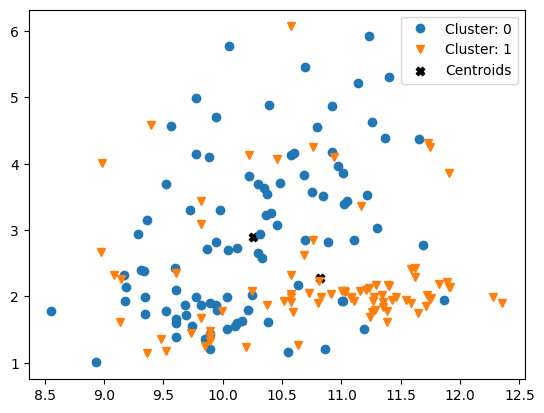

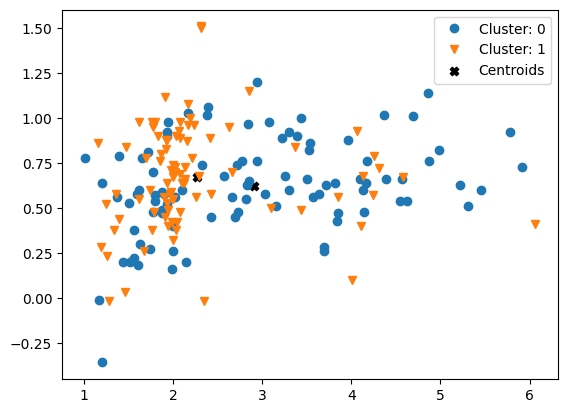

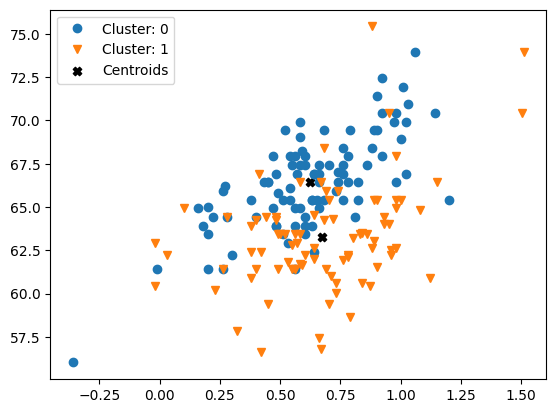

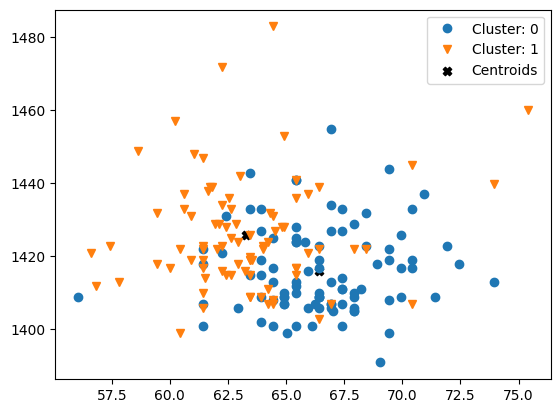

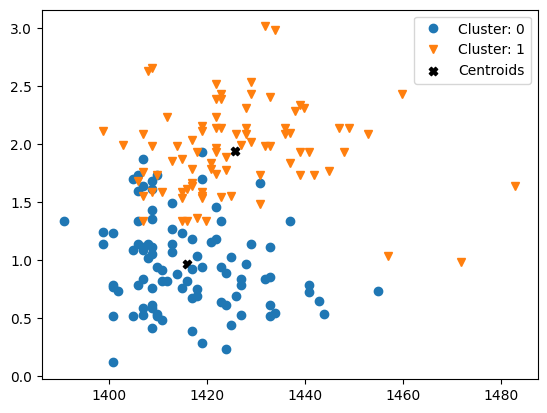

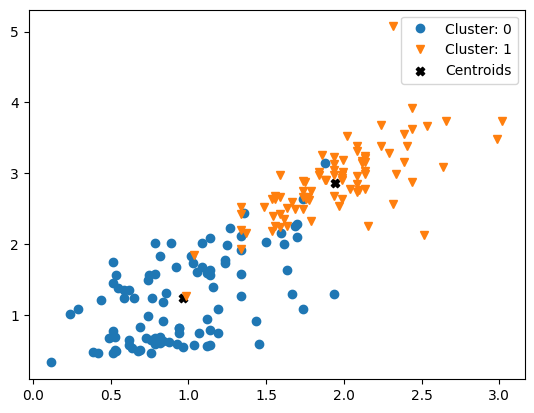

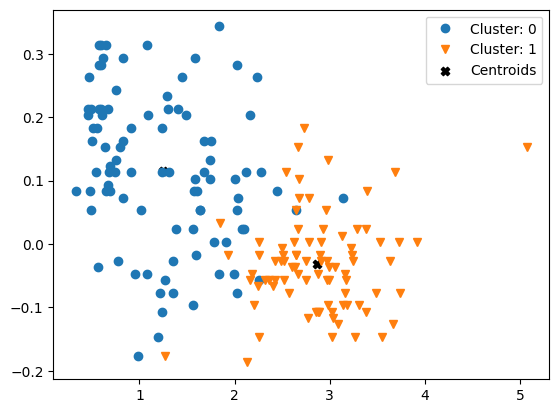

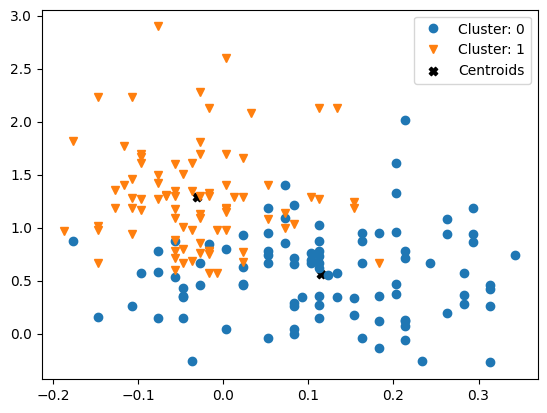

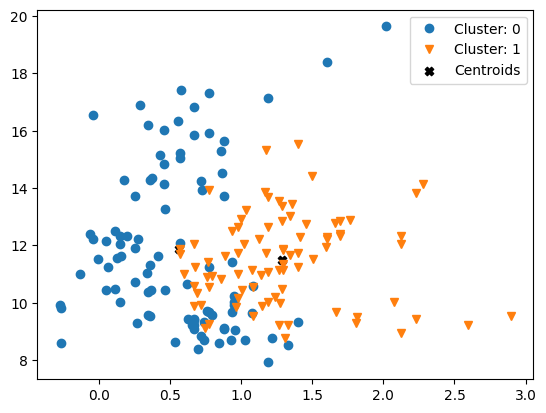

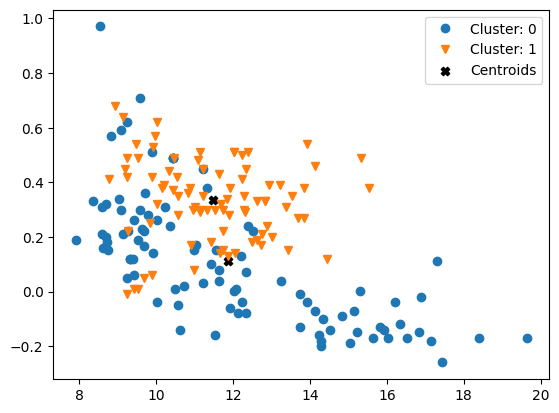

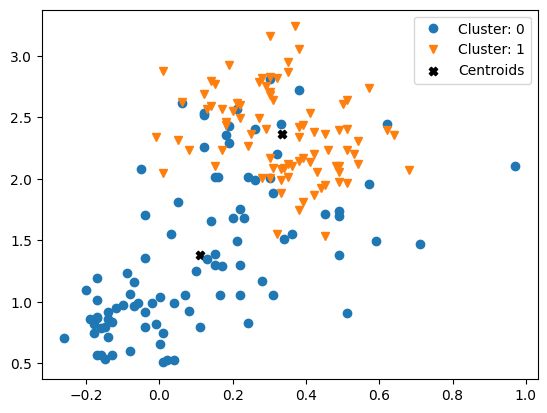

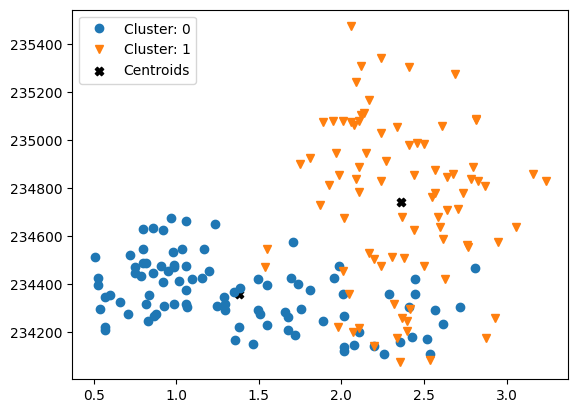

In [ ]:
data = pd.read_csv(r"C:\Users\whint\Downloads\Kmean_dataset.csv").to_numpy()

kmc = KMeansClustering()
kmc.clustering(data, 2, 10000)

for i in range(data.shape[1]-1):
  kmc.plot((i, i+1))